In [48]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [49]:
data = "https://raw.githubusercontent.com/Daven254/mlbookcamp-code/master/chapter-02-car-price/data_week2.csv"
!wget $data

--2022-06-20 17:00:09--  https://raw.githubusercontent.com/Daven254/mlbookcamp-code/master/chapter-02-car-price/data_week2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data_week2.csv’

data_week2.csv      100%[===================>]   1.41M  --.-KB/s    in 0.08s   

2022-06-20 17:00:09 (17.7 MB/s) - ‘data_week2.csv’ saved [1475504/1475504]



In [50]:
# making the data readable consistently
df = pd.read_csv(data)
df.columns = df.columns.str.lower().str.replace(' ','_') 
strings = list(df.dtypes[df.dtypes == 'object'].index)

for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_') 

# EDA

In [51]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


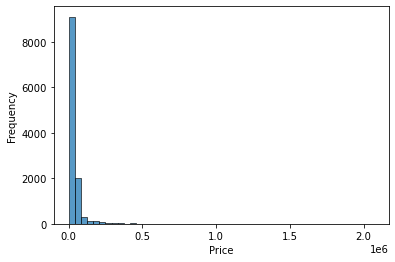

In [52]:
sns.histplot(df['msrp'],bins = 50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
plt.close()

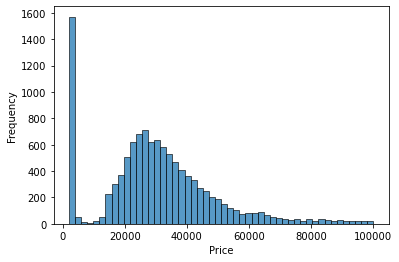

In [53]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.show()

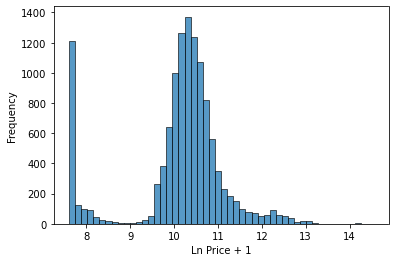

In [54]:
sns.histplot(np.log1p(df['msrp']),bins = 50)
plt.xlabel('Ln Price + 1')
plt.ylabel('Frequency')
plt.show()

In [55]:
# checking for NA values for each column and counting them
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting up each df 
(train, validation, and test dataframes)

In [56]:
np.random.seed(4)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [57]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [58]:
y_train_orig = df_train['msrp'].values
y_val_orig = df_val['msrp'].values
y_test_orig = df_test['msrp'].values

y_train = np.log1p(df_train['msrp'].values)
y_val = np.log1p(df_val['msrp'].values)
y_test = np.log1p(df_test['msrp'].values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# Linear Regression Modeling

In [59]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0],w[1:]

In [60]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [61]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [62]:
def rmse(y,y_pred):
    diff = y-y_pred
    diff_squared = diff**2
    mse = diff_squared.mean()
    return mse

RMSE: 0.5649797632993551


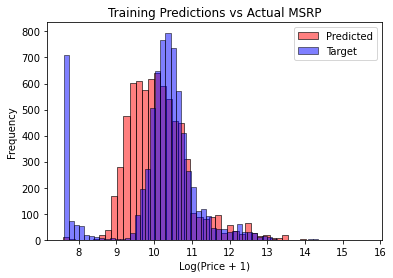

In [63]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

print('RMSE:',rmse(y_train,y_pred))

sns.histplot(y_pred, bins = 50, alpha = 0.5, color = 'red', label = 'Predicted')
sns.histplot(y_train, bins = 50, alpha = 0.5, color = 'blue', label = 'Target')
plt.legend()
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.title('Training Predictions vs Actual MSRP')
plt.show()


RMSE: 0.5459600454136213


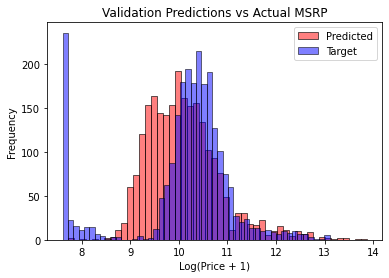

In [64]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

print('RMSE:',rmse(y_val,y_pred))

sns.histplot(y_pred, bins = 50, alpha = 0.5, color = 'red', label = 'Predicted')
sns.histplot(y_val, bins = 50, alpha = 0.5, color = 'blue', label = 'Target')
plt.legend()
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.title('Validation Predictions vs Actual MSRP')
plt.show()

RMSE: 0.591059981002329


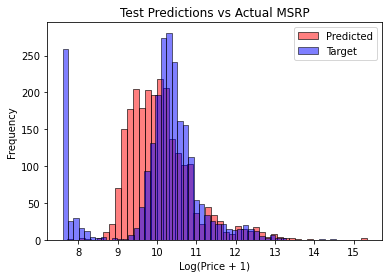

In [65]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

print('RMSE:',rmse(y_test,y_pred))

sns.histplot(y_pred, bins = 50, alpha = 0.5, color = 'red', label = 'Predicted')
sns.histplot(y_test, bins = 50, alpha = 0.5, color = 'blue', label = 'Target')
plt.legend()
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.title('Test Predictions vs Actual MSRP')
plt.show()

Each time, the prediction undersold the price of cars

# Feature Engineering

In [66]:
# accounting for age of the car
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

Train RMSE: 0.26667470945670796


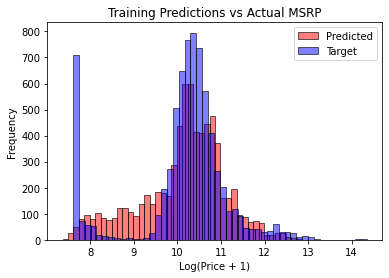

Validation RMSE: 0.25666364433389793


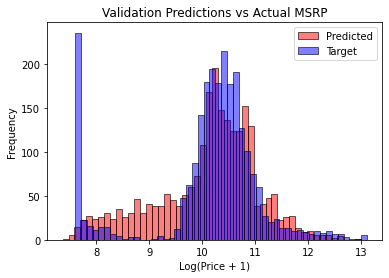

In [67]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

print('Train RMSE:',rmse(y_train,y_pred))

sns.histplot(y_pred, bins = 50, alpha = 0.5, color = 'red', label = 'Predicted')
sns.histplot(y_train, bins = 50, alpha = 0.5, color = 'blue', label = 'Target')
plt.legend()
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.title('Training Predictions vs Actual MSRP')
plt.show()
plt.close()

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

print('Validation RMSE:',rmse(y_val,y_pred))

sns.histplot(y_pred, bins = 50, alpha = 0.5, color = 'red', label = 'Predicted')
sns.histplot(y_val, bins = 50, alpha = 0.5, color = 'blue', label = 'Target')
plt.legend()
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.title('Validation Predictions vs Actual MSRP')
plt.show()
plt.close()


Adding the age of the car greatly reduced the RMSE and the plots show that the distribution is more similar

In [68]:
top_20_make = list(df['make'].value_counts().head(20).index)
top_20_make

['chevrolet',
 'ford',
 'volkswagen',
 'toyota',
 'dodge',
 'nissan',
 'gmc',
 'honda',
 'mazda',
 'cadillac',
 'mercedes-benz',
 'suzuki',
 'bmw',
 'infiniti',
 'audi',
 'hyundai',
 'volvo',
 'subaru',
 'acura',
 'kia']

In [69]:
# accounting for number of doors on the car and the make
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in top_20_make:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

Train RMSE: 0.2325673735899012


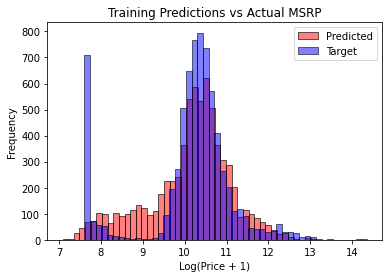

Validation RMSE: 0.2294942432089475


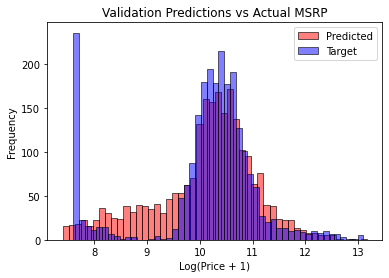

In [70]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

print('Train RMSE:',rmse(y_train,y_pred))

sns.histplot(y_pred, bins = 50, alpha = 0.5, color = 'red', label = 'Predicted')
sns.histplot(y_train, bins = 50, alpha = 0.5, color = 'blue', label = 'Target')
plt.legend()
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.title('Training Predictions vs Actual MSRP')
plt.show()
plt.close()

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

print('Validation RMSE:',rmse(y_val,y_pred))

sns.histplot(y_pred, bins = 50, alpha = 0.5, color = 'red', label = 'Predicted')
sns.histplot(y_val, bins = 50, alpha = 0.5, color = 'blue', label = 'Target')
plt.legend()
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.title('Validation Predictions vs Actual MSRP')
plt.show()
plt.close()


In [71]:
fuel_types = list(df['engine_fuel_type'].value_counts().index)
fuel_types

['regular_unleaded',
 'premium_unleaded_(required)',
 'premium_unleaded_(recommended)',
 'flex-fuel_(unleaded/e85)',
 'diesel',
 'electric',
 'flex-fuel_(premium_unleaded_required/e85)',
 'flex-fuel_(premium_unleaded_recommended/e85)',
 'flex-fuel_(unleaded/natural_gas)',
 'natural_gas']

In [72]:
# accounting for number of doors on the car and the make
# accounting for fuel type
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in top_20_make:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
        
    for v in fuel_types:
        feature = 'is_fuel_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

Train RMSE: 0.20520792368447754


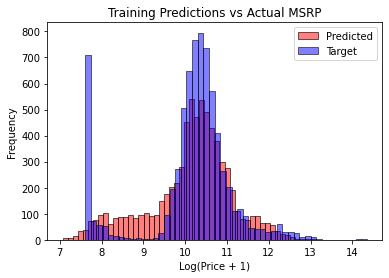

Validation RMSE: 0.2084496250975795


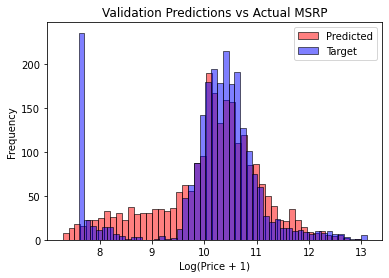

In [73]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

print('Train RMSE:',rmse(y_train,y_pred))

sns.histplot(y_pred, bins = 50, alpha = 0.5, color = 'red', label = 'Predicted')
sns.histplot(y_train, bins = 50, alpha = 0.5, color = 'blue', label = 'Target')
plt.legend()
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.title('Training Predictions vs Actual MSRP')
plt.show()
plt.close()

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

print('Validation RMSE:',rmse(y_val,y_pred))

sns.histplot(y_pred, bins = 50, alpha = 0.5, color = 'red', label = 'Predicted')
sns.histplot(y_val, bins = 50, alpha = 0.5, color = 'blue', label = 'Target')
plt.legend()
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.title('Validation Predictions vs Actual MSRP')
plt.show()
plt.close()


In [74]:
category_columns = ['make','engine_fuel_type','transmission_type', 'driven_wheels', 'market_category', 'vehicle_size','vehicle_style']

In [75]:
category = {}
for x in category_columns:
    category[x] = df_train[x].value_counts().head().index



In [76]:
# accounting for number of doors on the car and the make
# accounting for fuel type
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)
        
    for v in top_20_make:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
    
    for v in fuel_types:
        feature = 'is_fuel_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    for c, values in category.items():
        for v in values:
            df['%s_%s' % (c,v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c,v))

            

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [77]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

17229854.914921824

# Regularization

In [78]:
#Regularization of the linear regression function
def train_linear_regression(X,y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0],w[1:]

In [79]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.1994535336161814

Train RMSE: 0.1927510969568163


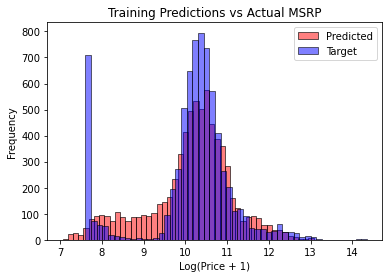

Validation RMSE: 0.19965149323189502


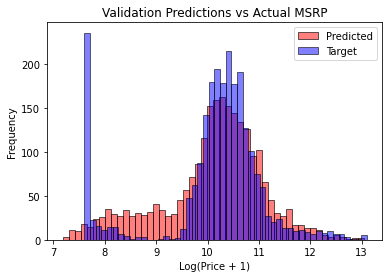

In [80]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train,1.1)

y_pred = w0 + X_train.dot(w)

print('Train RMSE:',rmse(y_train,y_pred))

sns.histplot(y_pred, bins = 50, alpha = 0.5, color = 'red', label = 'Predicted')
sns.histplot(y_train, bins = 50, alpha = 0.5, color = 'blue', label = 'Target')
plt.legend()
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.title('Training Predictions vs Actual MSRP')
plt.show()
plt.close()

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

print('Validation RMSE:',rmse(y_val,y_pred))

sns.histplot(y_pred, bins = 50, alpha = 0.5, color = 'red', label = 'Predicted')
sns.histplot(y_val, bins = 50, alpha = 0.5, color = 'blue', label = 'Target')
plt.legend()
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.title('Validation Predictions vs Actual MSRP')
plt.show()
plt.close()


# Model Tuning

In [146]:
r = np.linspace(1e-5,1e4,10000000)

In [ ]:
rmse_dict = {}
for x in r:
#for x in np.arange(0,10,0.00001,dtype = float):

    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train,x)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    rmse_dict[x] = rmse(y_val,y_pred)
    #print(x,'\t',rmse_dict[x],'\t',w0)



In [126]:
r_value = (min(rmse_dict, key = rmse_dict.get))
r_value

0.2002101801801802

# Using the Model

In [127]:
#using both the train and validation df, creating the weights and base pricing
df_full_train = (pd.concat([df_train,df_val])).reset_index(drop = True)
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train,y_val])

In [128]:
w0, w = train_linear_regression(X_full_train, y_full_train,r_value)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

rmse(y_test,y_pred)

0.20298055396799747

Test RMSE: 0.20298055396799747


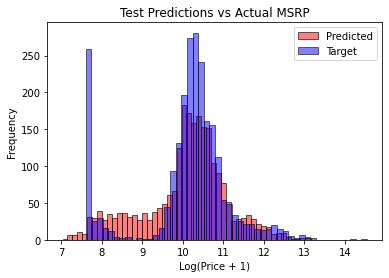

In [129]:
print('Test RMSE:',rmse(y_test,y_pred))

sns.histplot(y_pred, bins = 50, alpha = 0.5, color = 'red', label = 'Predicted')
sns.histplot(y_test, bins = 50, alpha = 0.5, color = 'blue', label = 'Target')
plt.legend()
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.title('Test Predictions vs Actual MSRP')
plt.show()

# Testing it out

In [138]:
a = 34

In [139]:
test_car = df_test.iloc[a].to_dict()

In [140]:
df_test_car = pd.DataFrame([test_car])

In [141]:
X_test_car = prepare_X(df_test_car)

In [142]:
y_pred = (w0 + X_test_car.dot(w))[0]
y_pred

7.718730942097169

In [143]:
np.expm1(y_pred)

2249.1022578457155

In [144]:
test_car

{'make': 'dodge',
 'model': 'dynasty',
 'year': 1992,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 100.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'midsize',
 'vehicle_style': 'sedan',
 'highway_mpg': 26,
 'city_mpg': 19,
 'popularity': 1851}

In [145]:
np.expm1(y_test[a])

2000.0